# Convolutional Layer

<img src = "https://i.ytimg.com/vi/KuXjwB4LzSA/hq720.jpg?sqp=-oaymwEcCNAFEJQDSFXyq4qpAw4IARUAAIhCGAFwAcABBg==&rs=AOn4CLDglX1Jo3WO2XUsh9x0ACDpEuNpCQ">

A convolutional layer is a fundamental building block of convolutional neural networks (CNNs), a type of deep learning model commonly used for image classification and computer vision tasks. The convolutional layer applies a set of filters to the input image, which helps to extract features and identify patterns at different spatial scales.

Each filter is a small matrix of weights that slides over the input image and computes a dot product at each position. The output of the convolutional layer is a set of feature maps, where each map corresponds to a specific filter and encodes the presence or absence of a particular visual pattern.

Convolutional layers are often followed by activation functions (such as ReLU) and pooling layers, which help to further reduce the dimensionality of the feature maps and capture higher-level features. By stacking multiple convolutional layers, the neural network can learn increasingly complex representations of the input image.

In addition to convolutional layers, image preprocessing is another important aspect of building effective CNNs. Common preprocessing techniques include resizing the images to a fixed size, normalizing the pixel values, and applying data augmentation techniques (such as rotation, translation, and flipping) to increase the diversity of the training data and prevent overfitting. These preprocessing steps can help to improve the accuracy and generalization of the model.

$$Y_i = B_i + \sum\limits_{i = 1}^{n}(x_{ij} * k_{ij})$$

[Image Credits](https://www.youtube.com/watch?v=KuXjwB4LzSA)


In [3]:
import cv2
import scipy
import numpy as np
from matplotlib import pyplot as plt

Okay se we all know if we do $$(x+y)(x+y) = (x+y)^2 = x^2 + 2xy + y^2$$

and $$(x + y + z)(x + y + z) = (x + y + z)^2 = x^2 + y^2 + z^2 + 2(xy + yz+ zx)$$

This was preety simple, but what if we have higher degrees like $$(x+ y + z....100terms)^2$$ or $$(a+b...89_-terms)(y+g...45_-terms)(t+y...69_-terms)$$ 

Lets assume we want the coeffiecents of the eqution $(x+y)^2 =? $

In [ ]:
np.convolve([1 , 1] , [1 , 1])

array([1, 2, 1])

The coeffiecients will be $(1 , 2 , 1)$ or $(1x^2 + 2xy + 1y^2)$

What if we want of more 

In [ ]:
np.convolve([1 , 1 , 1] , 
            [1 , 1 , 1])

array([1, 2, 3, 2, 1])

The coeffiecients will be $(1 , 2, 3 , 2 , 1)$ or $(1x^4 + 2x^3 + 3x^2 + 2x + 1)$

And furthermore

In [ ]:
np.convolve([1 , 2 , 3] , 
            [4 , 5 , 6] , 
            [7 , 8 , 9])

TypeError: ignored

So we cannot do this directly, what we can rather do is

In [ ]:
np.convolve(np.convolve([1 , 2 , 3] , 
                        [4 , 5 , 6]) , 
            [7 , 8 , 9])

array([ 28, 123, 336, 530, 594, 387, 162])

Or

In [ ]:
np.convolve(np.convolve([4 , 5 , 6] , 
                       [7 , 8 , 9]) , 
           [1 , 2 ,3])

array([ 28, 123, 336, 530, 594, 387, 162])

And we got the same arrays 

But this gets tricky when we have high level of arrays 

In [4]:
array_1 = np.arange(1000000)
array_2 = np.arange(1000000)

In [7]:
# np.convolve(array_1 , array_2) # Thats gonna take a lot of time, I dont want to loose my cores, I have already lost 5 :( , and thus i am commenting this out

So how can we do large functions, for that we use

In [6]:
scipy.signal.fftconvolve(array_1 , array_2)

array([5.87202560e+01, 2.51658240e+01, 1.09051904e+02, ...,
       2.99998800e+12, 1.99999400e+12, 9.99998000e+11])

And that was preety quick 

One more intution you can get of convolve is from the rolling of the dice

<img src = "https://www.math-only-math.com/images/xprobability-for-rolling-two-dice.jpg.pagespeed.ic.MTXD4wiqQ_.jpg">

|Terms|No of occrences, if both the dice are added|
|---|---|
|1|0|
|2|1|
|3|2|
|4|3|
|5|4|
|6|5|
|7|6|
|8|5|
|9|4|
|10|3|
|11|2|
|12|1|


And the convolve of $(1 , 1 , 1 , 1 , 1 , 1)*((1 , 1 , 1 , 1 , 1 , 1))$ is 

In [ ]:
np.convolve([1 , 1 , 1 , 1 , 1 , 1] , 
            [1 , 1 , 1 , 1 , 1 , 1])

array([1, 2, 3, 4, 5, 6, 5, 4, 3, 2, 1])

Notice something??

Convolve is basically aslo teeling the number of occurence of the number in a particular order.

So now we have a basic understanding of the convolve, Lets now try to use it on an array representing an image

Lets assume we have this image for example

In [8]:
test_img = cv2.imread("/content/VGPeJ6s.jpg")

And it look like this

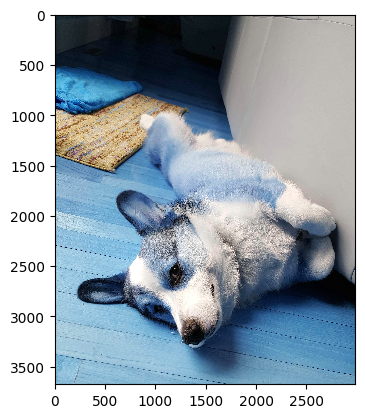

In [9]:
plt.imshow(test_img, interpolation='nearest')
plt.show()

In array format, it looks like this 

In [ ]:
test_img

array([[[ 21,  38,  51],
        [ 22,  39,  52],
        [ 24,  41,  54],
        ...,
        [192, 188, 183],
        [192, 188, 183],
        [193, 189, 184]],

       [[ 21,  38,  51],
        [ 22,  39,  52],
        [ 24,  41,  54],
        ...,
        [192, 188, 183],
        [192, 188, 183],
        [193, 189, 184]],

       [[ 21,  38,  51],
        [ 22,  39,  52],
        [ 24,  41,  54],
        ...,
        [192, 188, 183],
        [192, 188, 183],
        [192, 188, 183]],

       ...,

       [[145, 190, 217],
        [145, 190, 217],
        [145, 190, 217],
        ...,
        [113, 163, 193],
        [110, 160, 190],
        [108, 158, 188]],

       [[145, 190, 217],
        [145, 190, 217],
        [145, 190, 217],
        ...,
        [113, 163, 193],
        [110, 160, 190],
        [108, 158, 188]],

       [[145, 190, 217],
        [145, 190, 217],
        [145, 190, 217],
        ...,
        [113, 163, 193],
        [110, 160, 190],
        [108, 158, 188]]

In [10]:
filter = np.array([[[0 , -1 , 0] , 
                  [-1 , 5 , -1] , 
                  [0 , -1 , 0]] , 
                  [[0 , -1 , 0] , 
                  [-1 , 5 , -1] , 
                  [0 , -1 , 0]] , 
                  [[0 , -1 , 0] , 
                  [-1 , 5 , -1] , 
                  [0 , -1 , 0]]])

In [11]:
filter

array([[[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]],

       [[ 1,  0, -1],
        [ 1,  0, -1],
        [ 1,  0, -1]]])

If we directly convolve the matrices, this will be the output

In [15]:
signal.fftconvolve(test_img , filter)

array([[[   21.,    38.,    30.,   -38.,   -51.],
        [   43.,    77.,    60.,   -77.,  -103.],
        [   67.,   118.,    90.,  -118.,  -157.],
        ...,
        [  577.,   565.,   -27.,  -565.,  -550.],
        [  385.,   377.,   -18.,  -377.,  -367.],
        [  193.,   189.,    -9.,  -189.,  -184.]],

       [[   42.,    76.,    60.,   -76.,  -102.],
        [   86.,   154.,   120.,  -154.,  -206.],
        [  134.,   236.,   180.,  -236.,  -314.],
        ...,
        [ 1154.,  1130.,   -54., -1130., -1100.],
        [  770.,   754.,   -36.,  -754.,  -734.],
        [  386.,   378.,   -18.,  -378.,  -368.]],

       [[   63.,   114.,    90.,  -114.,  -153.],
        [  129.,   231.,   180.,  -231.,  -309.],
        [  201.,   354.,   270.,  -354.,  -471.],
        ...,
        [ 1730.,  1694.,   -81., -1694., -1649.],
        [ 1154.,  1130.,   -54., -1130., -1100.],
        [  578.,   566.,   -27.,  -566.,  -551.]],

       ...,

       [[  435.,   570.,   216.,  -570.,  

You notice these values get bigger, this because of the method we use to convolve, this is called the `full convolve`. But we need to use the actual matrix convolve, for this we just need to do 

In [16]:
signal.fftconvolve(test_img , filter , "valid")

array([[[270.],
        [270.],
        [270.],
        ...,
        [-81.],
        [-81.],
        [-81.]],

       [[270.],
        [270.],
        [270.],
        ...,
        [-81.],
        [-81.],
        [-81.]],

       [[270.],
        [270.],
        [270.],
        ...,
        [-81.],
        [-81.],
        [-81.]],

       ...,

       [[678.],
        [678.],
        [678.],
        ...,
        [750.],
        [750.],
        [750.]],

       [[663.],
        [663.],
        [663.],
        ...,
        [735.],
        [735.],
        [735.]],

       [[648.],
        [648.],
        [648.],
        ...,
        [720.],
        [720.],
        [720.]]])

Now we got the proper values, but we cannot plot these on the nummber line. We need array with $3$ channels, but this is with $1$ channel. Lets try to get that 

In [18]:
sample = signal.fftconvolve(test_img , filter , "same")

In [19]:
sample

array([[[  154.,   120.,  -154.],
        [  236.,   180.,  -236.],
        [  246.,   180.,  -246.],
        ...,
        [ 1128.,   -54., -1128.],
        [ 1130.,   -54., -1130.],
        [  754.,   -36.,  -754.]],

       [[  231.,   180.,  -231.],
        [  354.,   270.,  -354.],
        [  368.,   270.,  -368.],
        ...,
        [ 1692.,   -81., -1692.],
        [ 1694.,   -81., -1694.],
        [ 1130.,   -54., -1130.]],

       [[  233.,   180.,  -233.],
        [  356.,   270.,  -356.],
        [  367.,   270.,  -367.],
        ...,
        [ 1693.,   -81., -1693.],
        [ 1692.,   -81., -1692.],
        [ 1128.,   -54., -1128.]],

       ...,

       [[ 1125.,   442., -1125.],
        [ 1690.,   663., -1690.],
        [ 1694.,   663., -1694.],
        ...,
        [ 1481.,   735., -1481.],
        [ 1465.,   735., -1465.],
        [  971.,   490.,  -971.]],

       [[ 1140.,   432., -1140.],
        [ 1710.,   648., -1710.],
        [ 1710.,   648., -1710.],
        .

What if we try to plot this on a graph

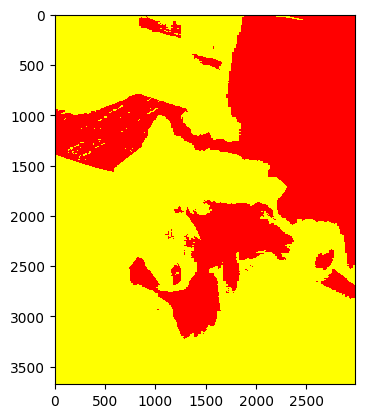

In [20]:
plt.imshow(sample, interpolation='nearest')
plt.show()

And we didnt expected this.

This was because we were doing the wrong steps till now, we were convolving the worng things 

Let me tell you, a convolve is basically sliding the kernel over another mmatrix and then finding the correlation with the kernel and the part of matrix it is over.

For that we need an image having the shape $(depth , height , width)$, but we are doing convolve on the image $(height , width , depth)$, we need to reshape our image and then perform the convolve 

Lets assume we have the shape like this 

In [21]:
test_img.shape

(3675, 2988, 3)

Lets store this in some varibales, for better usage 

In [22]:
h , w , d = test_img.shape

Our new shape will be 

In [23]:
test = np.reshape(test_img , newshape = (d , h , w))

Now our image looks like this 

In [24]:
test

array([[[ 21,  38,  51, ...,   3,   7,  12],
        [  3,   7,  12, ..., 153, 149, 144],
        [156, 152, 147, ..., 193, 189, 184],
        ...,
        [165, 128,  72, ..., 141, 162, 193],
        [141, 162, 193, ..., 183, 177, 178],
        [186, 180, 181, ..., 193, 189, 184]],

       [[136,  99,  43, ..., 138, 159, 190],
        [138, 159, 190, ..., 183, 177, 178],
        [186, 180, 181, ..., 193, 189, 184],
        ...,
        [169, 212, 233, ..., 143, 163, 188],
        [117, 137, 162, ..., 148, 150, 161],
        [151, 153, 164, ..., 156, 156, 156]],

       [[153, 196, 217, ..., 138, 158, 183],
        [115, 135, 160, ..., 149, 151, 162],
        [139, 141, 152, ..., 157, 157, 157],
        ...,
        [145, 190, 217, ..., 143, 188, 215],
        [147, 192, 219, ..., 121, 166, 193],
        [127, 172, 199, ..., 108, 158, 188]]], dtype=uint8)

And the shape is like this 

In [25]:
test.shape

(3, 3675, 2988)

And now we needed something like this 

Now we need to convolve every channel of the image and then stack them all into a single array 

But now we also need to change our filter 

In [38]:
filter = np.array([[0 , -1 , 0] , 
                  [-1 , 5 , -1] , 
                  [0 , -1 , 0]])

In [39]:
image_0 = signal.convolve2d(test[0] , filter , "same")

In [40]:
image_1 = signal.convolve2d(test[1] , filter , "same")

In [41]:
image_2 = signal.convolve2d(test[2] , filter , "same")

In [42]:
image = np.array([image_0 , image_1 , image_2])

In [43]:
image.shape

(3, 3675, 2988)

This type of shape is not accepted by the `opencv` module, we need to reshape it again 

In [44]:
d_ , h_ , w_ = image.shape

In [45]:
ima = np.reshape(image , (h_ , w_ , d_))

In [46]:
ima

array([[[  64,  111,  183],
        [  17,  114,  185],
        [  24,  120,  191],
        ...,
        [ 433,  409,  379],
        [ 433,  409,  378],
        [ 437,  412,  575]],

       [[ -92,  -41,   36],
        [-139,  -38,   38],
        [-132,  -32,   44],
        ...,
        [ 433,  409,  379],
        [ 433,  409,  378],
        [ 437,  412,  575]],

       [[ -92,  -41,   36],
        [-139,  -38,   38],
        [-132,  -32,   45],
        ...,
        [ 433,  409,  379],
        [ 433,  409,  379],
        [ 433,  409,  571]],

       ...,

       [[ 265,  228,  336],
        [  47,  227,  335],
        [  50,  230,  338],
        ...,
        [ -57,  155,  284],
        [ -66,  147,  275],
        [ -74,  138,  372]],

       [[ 261,  224,  332],
        [  49,  229,  337],
        [  56,  236,  344],
        ...,
        [ -56,  156,  285],
        [ -65,  148,  276],
        [ -73,  139,  373]],

       [[ 261,  224,  332],
        [  49,  229,  337],
        [  56,  

In [47]:
ima.shape

(3675, 2988, 3)

And now if we try to plot this image, we get this 

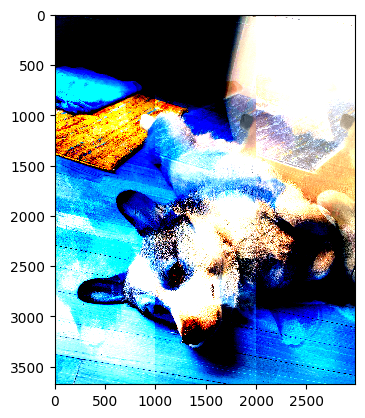

In [48]:
plt.imshow(ima, interpolation='nearest')
plt.show()

And this is what something we were trying to find 

And now we will just put all  of this into a function

In [ ]:
import scipy
import numpy as np 

def convolve(image , kernel):
    
    if image.shape[2] == 3:
    
        test_image = np.reshape(image , newshape = (3 , image.shape[0] , image.shape[1]))
    
    else :
    
        test_image = image
    
    sample = np.empty(shape = test_image.shape)
    
    for channels in range(test_image.shape[0]):
    
        sample = np.vstack([sampel , 
                            scipy.signal.convolve2d(test_image[channels] , kernel , "same")
    
        sample = np.delete(sample , 0 , 0)
    
    sample = np.reshape(sample , newshape = (sample.shape[1] , sample.shape[2] , sample.shape[0]))

    return sample